In [ ]:
# Enable interactive rotation of graph
%matplotlib inline

import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

import plotly.express as px
import plotly.graph_objects as go

# Load data for activity
X = np.loadtxt('sdata.csv',delimiter=',')
rows, cols = np.array(X.shape)

print('Rows of X = ',rows)
print('Cols of X = ',cols)

Rows of X =  1000
Cols of X =  3


# 2a)

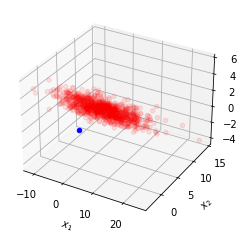

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2], c='r', marker='o', alpha=0.1)
ax.scatter(0,0,0,c='b', marker='o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

plt.show()

# for rotation in Google colab
fig = px.scatter_3d(X, x=0, y=1, z=2)
fig.add_trace(
    go.Scatter3d(x=[0],
                 y=[0],
                 z=[0],
                 mode='markers')
)
fig.show()

# 2c)

In [ ]:
# Subtract mean
X_m = X - np.mean(X, 0)

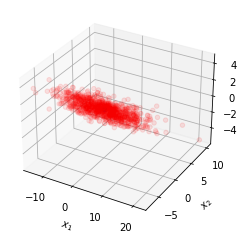

In [ ]:
# display zero mean scatter plot
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_m[:,0], X_m[:,1], X_m[:,2], c='r', marker='o', alpha=0.1)

ax.scatter(0,0,0,c='b', marker='o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

plt.show()

# for rotation in Google colab
fig = px.scatter_3d(X_m, x=0, y=1, z=2)
fig.add_trace(
    go.Scatter3d(x=[0],
                 y=[0],
                 z=[0],
                 mode='markers')
)
fig.show()

# 2d)

In [ ]:
# Use SVD to find first principal component

U,s,VT = np.linalg.svd(X_m,full_matrices=False)

# complete the next line of code to assign the first principal component to a
a = VT[0,:]

print(a)

[-0.87325954 -0.43370914  0.2220679 ]


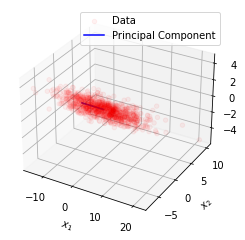

In [ ]:
# display zero mean scatter plot and first principal component

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#scale length of line by root mean square of data for display
ss = s[0]/np.sqrt(np.shape(X_m)[0])

ax.scatter(X_m[:,0], X_m[:,1], X_m[:,2], 
           c='r', marker='o', label='Data', alpha=0.05)

ax.plot([0,ss*a[0]],[0,ss*a[1]],[0,ss*a[2]], c='b',label='Principal Component')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

ax.legend()
plt.show()

# for rotation in Google colab
fig = px.scatter_3d(X_m, x=0, y=1, z=2)
fig.add_trace(
    go.Scatter3d(x=[0,ss*a[0]],
                 y=[0,ss*a[1]],
                 z=[0,ss*a[2]],
                 line=dict(width=15))
)
fig.show()

# 2g) and 2k)

In [132]:
U,s,VT = np.linalg.svd(X_m,full_matrices=False)

rank_one = np.array([U[:,0]]).transpose()*s[0]*a
rank_one += np.mean(X, 0)

E = X-rank_one

print(s[1]**2+s[2]**2)
print("Rank 1 squared error: ", np.linalg.norm(E, ord = 'fro')**2)

626.6899203862782
Rank 1 squared error:  626.6899203862775


# 2h)

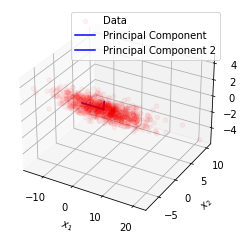

In [ ]:
a2=VT[1,:]

# display zero mean scatter plot and first principal component

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#scale length of line by root mean square of data for display
ss = s[0]/np.sqrt(np.shape(X_m)[0])

ax.scatter(X_m[:,0], X_m[:,1], X_m[:,2], 
           c='r', marker='o', label='Data', alpha=0.05)

ax.plot([0,ss*a[0]],[0,ss*a[1]],[0,ss*a[2]], c='b',label='Principal Component')
ax.plot([0,a2[0]],[0,a2[1]],[0,a2[2]], c='b',label='Principal Component 2')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

ax.legend()
plt.show()

# for rotation in Google colab
fig = px.scatter_3d(X_m, x=0, y=1, z=2)
fig.add_trace(
    go.Scatter3d(x=[0,ss*a[0]],
                 y=[0,ss*a[1]],
                 z=[0,ss*a[2]],
                 line=dict(width=15))
)
fig.add_trace(
    go.Scatter3d(x=[0,a2[0]],
                 y=[0,a2[1]],
                 z=[0,a2[2]],
                 line=dict(width=15))
)
fig.show()

# 2i)

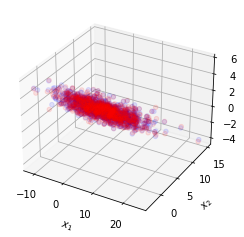

In [ ]:
U,s,VT = np.linalg.svd(X_m,full_matrices=False)

S = np.zeros([2,2])
np.fill_diagonal(S, s[0:2])

rank_two = U[:,0:2]@S@VT[0:2]
rank_two += np.mean(X, 0)

# plots
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2], c='r', marker='o', alpha=0.1)
ax.scatter(rank_two[:,0], rank_two[:,1], rank_two[:,2], 
           c='b', marker='o', alpha=0.1)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

plt.show()

# for rotation in Google colab
fig = px.scatter_3d(X, x=0, y=1, z=2, 
                    color_discrete_sequence=px.colors.qualitative.Set1)
fig.add_trace(
    go.Scatter3d(x=rank_two[:,0],
                 y=rank_two[:,1],
                 z=rank_two[:,2], 
                 mode='markers',
                 marker=dict(color='blue'))
)
fig.show()

# 2j) and 2k)

In [133]:
U,s,VT = np.linalg.svd(X_m,full_matrices=False)

S = np.zeros([2,2])
np.fill_diagonal(S, s[0:2])

rank_two = U[:,0:2]@S@VT[0:2]
rank_two += np.mean(X, 0)

E = X-rank_two

print(s[2]**2)
print("Rank 2 error: ", np.linalg.norm(E, ord = 'fro')**2)

152.9455757788646
Rank 2 error:  152.9455757788646


# Q3

In [ ]:
in_data = loadmat("face_emotion_data.mat")
X = in_data['X']
y = in_data['y']

# split into eight sets
eight_sets = np.split(X, 8)
eight_y = np.split(y, 8)
total_error = []
weights_store = []
sum_error = 0

def compute_error(holdout, y_holdout, weights):
  y_hat = np.sign(holdout@weights)
  errors = [0 if i[0]==i[1] else 1 for i in np.hstack((y_holdout, y_hat))]
  return sum(errors)/16

# for the 8 partitions of the data set, remove one
for i in range(8):
  # for the leftover 7 sets, remove another
  # try each of the parameters values on the 6 and test error with the 7th
  for j in range(7):
    # remove 2 sets from the eight
    minus_1 = np.delete(eight_sets, i, axis=0)
    minus_2 = np.delete(eight_y, i, axis=0)
    training = np.delete(minus_1, j, axis=0).reshape(-1, 9)
    training_y = np.delete(minus_2, j, axis=0).reshape(96, -1)
    # for each value of r
    for r in range(1, 10):
      # weights
      U, s, VT = np.linalg.svd(training.transpose()@training,full_matrices=False)
      S = np.zeros([9,9])
      np.fill_diagonal(S[0:r], 1/s[0:r])
      np.fill_diagonal(S[r:9, r:9], 0)
      pseudo = VT.transpose()@S@U.transpose()
      weights = pseudo@training.transpose()@training_y
      weights_store.append(weights.transpose())
      # error for the 7th set
      total_error.append(compute_error(minus_1[j], minus_2[j], weights))
    # min error for each of the parameters
    minval = min(total_error)
    index = total_error.index(minval)
    # calculate error on last holdout set with best parameter value
    error_best = compute_error(eight_sets[i], eight_y[i], 
                               weights_store[index].transpose())
    sum_error += error_best
    total_error=[]

print("Average error: {per}%".format(per=(sum_error/56)*100))

Average error: 11.049107142857142%


In [ ]:
X = in_data['X']
y = in_data['y']

# split into eight sets
eight_sets = np.split(X, 8)
eight_y = np.split(y, 8)
total_error = []
weights_store = []
sum_error = 0

def compute_error(holdout, y_holdout, weights):
  y_hat = np.sign(holdout@weights)
  errors = [0 if i[0]==i[1] else 1 for i in np.hstack((y_holdout, y_hat))]
  return sum(errors)/16

lambdas = [0,2**-1,2**0,2**1,2**2,2**3,2**4]

# for the 8 partitions of the data set, remove one
for i in range(8):
  # for the leftover 7 sets, remove another
  # try each of the parameters values on the 6 and test error with the 7th
  for j in range(7):
    # remove 2 sets from the eight
    minus_1 = np.delete(eight_sets, i, axis=0)
    minus_2 = np.delete(eight_y, i, axis=0)
    training = np.delete(minus_1, j, axis=0).reshape(-1, 9)
    training_y = np.delete(minus_2, j, axis=0).reshape(96, -1)
    # for each lambda
    for r in lambdas:
      # weights
      U, s, VT = np.linalg.svd(training,full_matrices=False)
      S = np.zeros([9,9])
      np.fill_diagonal(S, s/(s**2+r))
      weights = VT.transpose()@S@U.transpose()@training_y
      weights_store.append(weights.transpose())
      # error for the 7th holdout set
      total_error.append(compute_error(minus_1[j], minus_2[j], weights))
    # min error for each of the parameters
    minval = min(total_error)
    index = total_error.index(minval)
    # calculate error on last holdout set with best parameter value
    error_best = compute_error(eight_sets[i], eight_y[i], 
                               weights_store[index].transpose())
    sum_error += error_best
    total_error=[]

print("Average error: {per}%".format(per=(sum_error/56)*100))

Average error: 4.129464285714286%
